In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

from itertools import combinations 
import itertools
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Data 144 Final Project/student-por.csv")
display(df.head(10))
print(df.shape)
#class (last column) is what we are trying to predict. L = 0-69, M = 70-89, H = 90-100

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,5,1,1,1,5,0,12,12,13


(649, 33)


In [4]:
#Create function that determines grade bin from 0-19 score:
# A = 16-19
# B = 12-15
# C = 8-11
# D = 4-7
# F = 0-3

df_wo_bins = df.copy()

def grade_bins(num):
  if num >= 16:
    return 'A'
  elif num >=12 and num <16:
    return 'B'
  elif num >=8 and num <12:
    return 'C'
  elif num >=4 and num <8:
    return 'D'
  else:
    return 'F'

df['G1_bin'] = df['G1'].apply(grade_bins)
df['G2_bin'] = df['G2'].apply(grade_bins)
df['G3_bin'] = df['G3'].apply(grade_bins)

df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G1_bin,G2_bin,G3_bin
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,F,C,C
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,C,C,C
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,B,B,B
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,B,B,B
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,C,B,B
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,2,1,2,5,6,12,12,13,B,B,B
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,13,12,13,B,B,B
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,2,10,13,13,C,B,B
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,2,2,1,1,1,0,15,16,17,B,A,A
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,5,1,1,1,5,0,12,12,13,B,B,B


In [5]:
def split_count(features):
  combos = []
  count = 0
  for i in range(len(features)):
    for combo in itertools.combinations(iter(features), i):
      if combo != ():
        combos += [combo] 
        count += 1
  return combos

In [6]:
#checking for null values in all columns
df.isnull().values.any()
#no null values

False

In [7]:
#checking for infinity values in all numeric columns
print(np.isinf(df['age']).values.sum())
print(np.isinf(df['Medu']).values.sum())
print(np.isinf(df['Fedu']).values.sum())
print(np.isinf(df['traveltime']).values.sum())
print(np.isinf(df['studytime']).values.sum())
print(np.isinf(df['failures']).values.sum())
print(np.isinf(df['famrel']).values.sum())
print(np.isinf(df['freetime']).values.sum())
print(np.isinf(df['goout']).values.sum())
print(np.isinf(df['Dalc']).values.sum())
print(np.isinf(df['Walc']).values.sum())
print(np.isinf(df['health']).values.sum())
print(np.isinf(df['absences']).values.sum())
print(np.isinf(df['G1']).values.sum())
print(np.isinf(df['G2']).values.sum())
print(np.isinf(df['G3']).values.sum())
#there are no infinity values

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


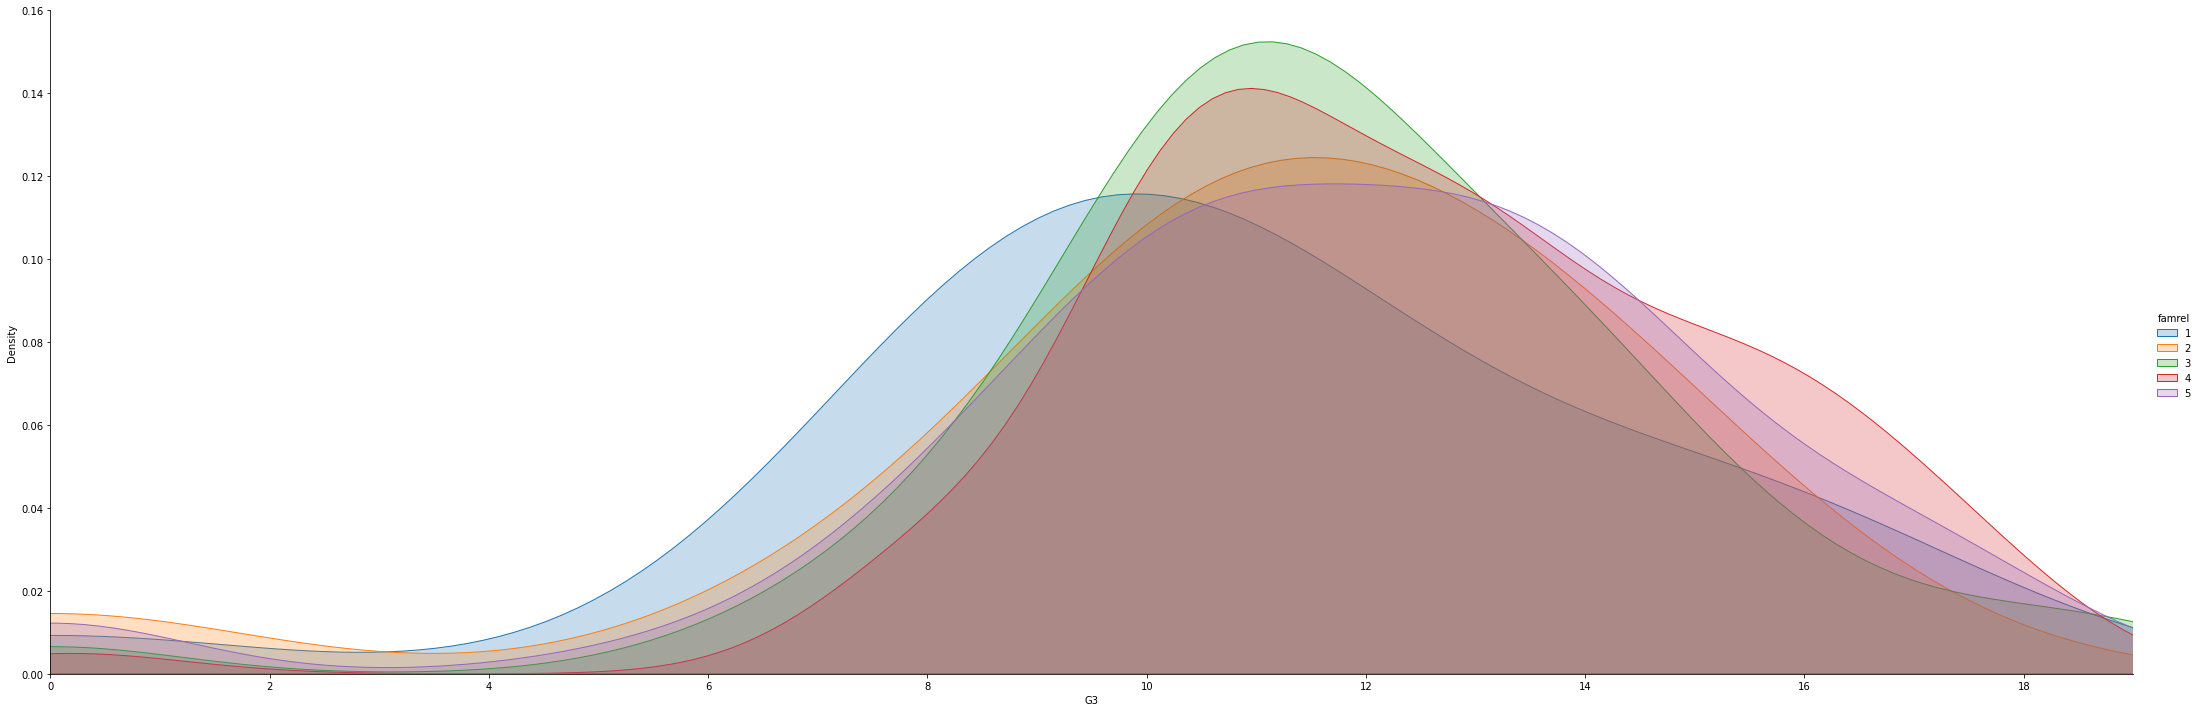

In [8]:
g = sns.FacetGrid(df, hue='famrel', height=10, aspect=3)
g.map(sns.kdeplot, 'G3', shade=True)
g.add_legend()
g.set(xticks=np.arange(0, df['G3'].max() + 1, 2), xlim=(0, df['G3'].max()))
#only notable difference is in students with really bad family relations (blue); their grade is lower on average than other students.

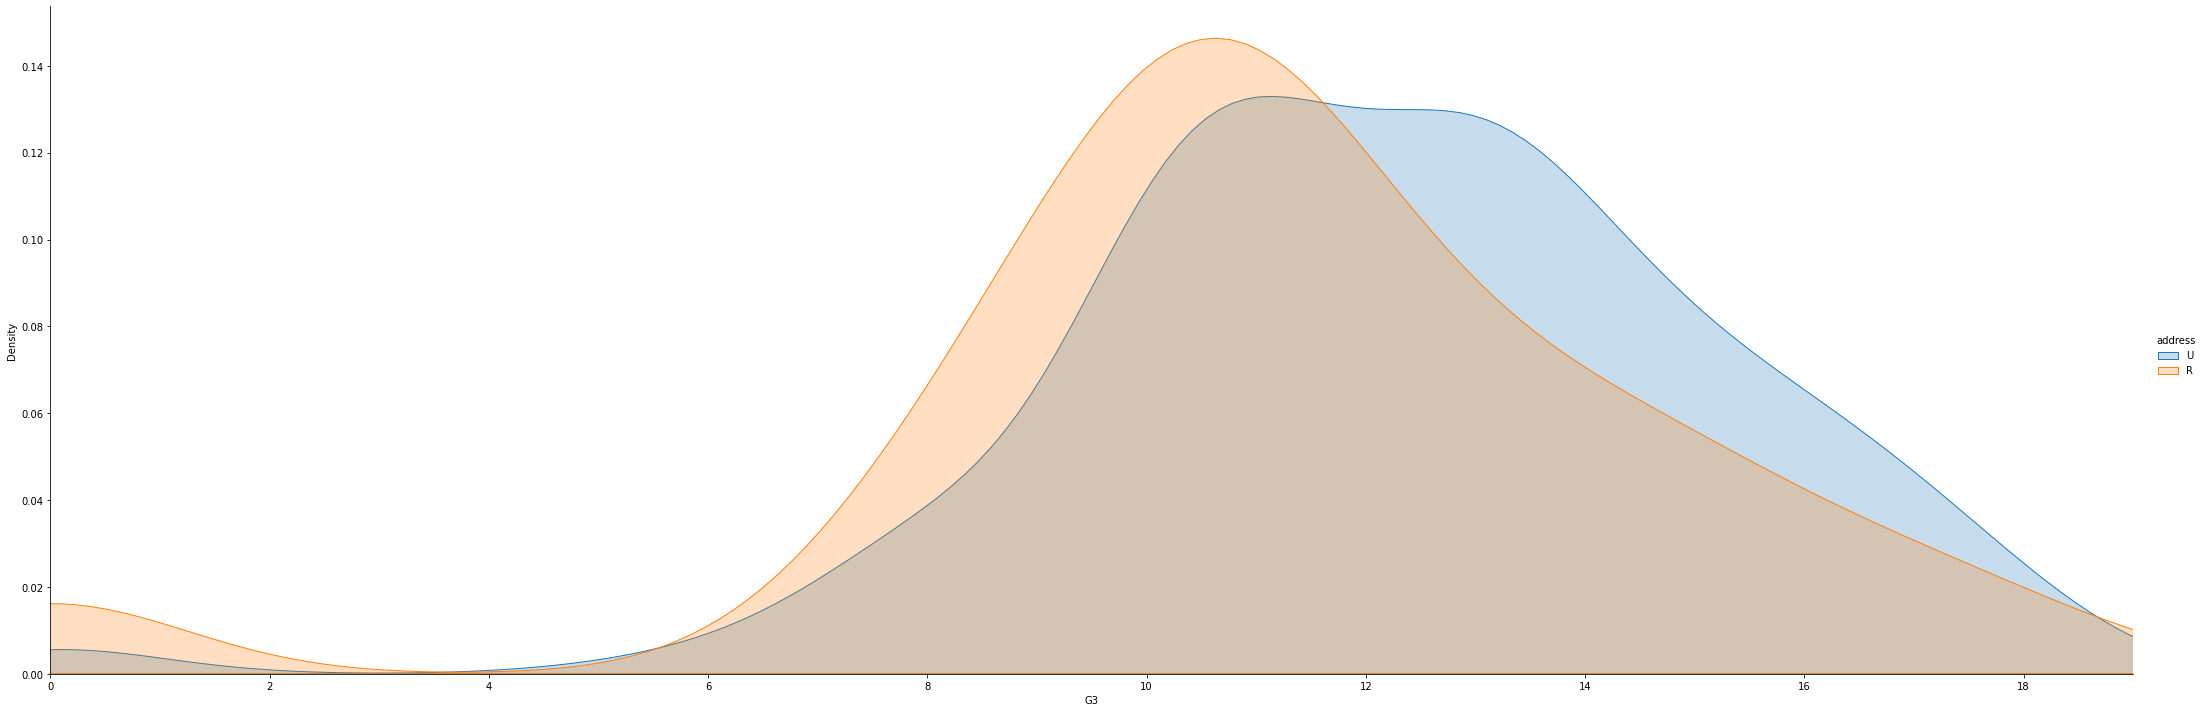

In [9]:
g = sns.FacetGrid(df, hue='address', height=10, aspect=3)
g.map(sns.kdeplot, 'G3', shade=True)
g.add_legend()
g.set(xticks=np.arange(0, df['G3'].max() + 1, 2), xlim=(0, df['G3'].max()))
#students with urban address are more variable, but students with rural address have very clear peak/average final grade.   

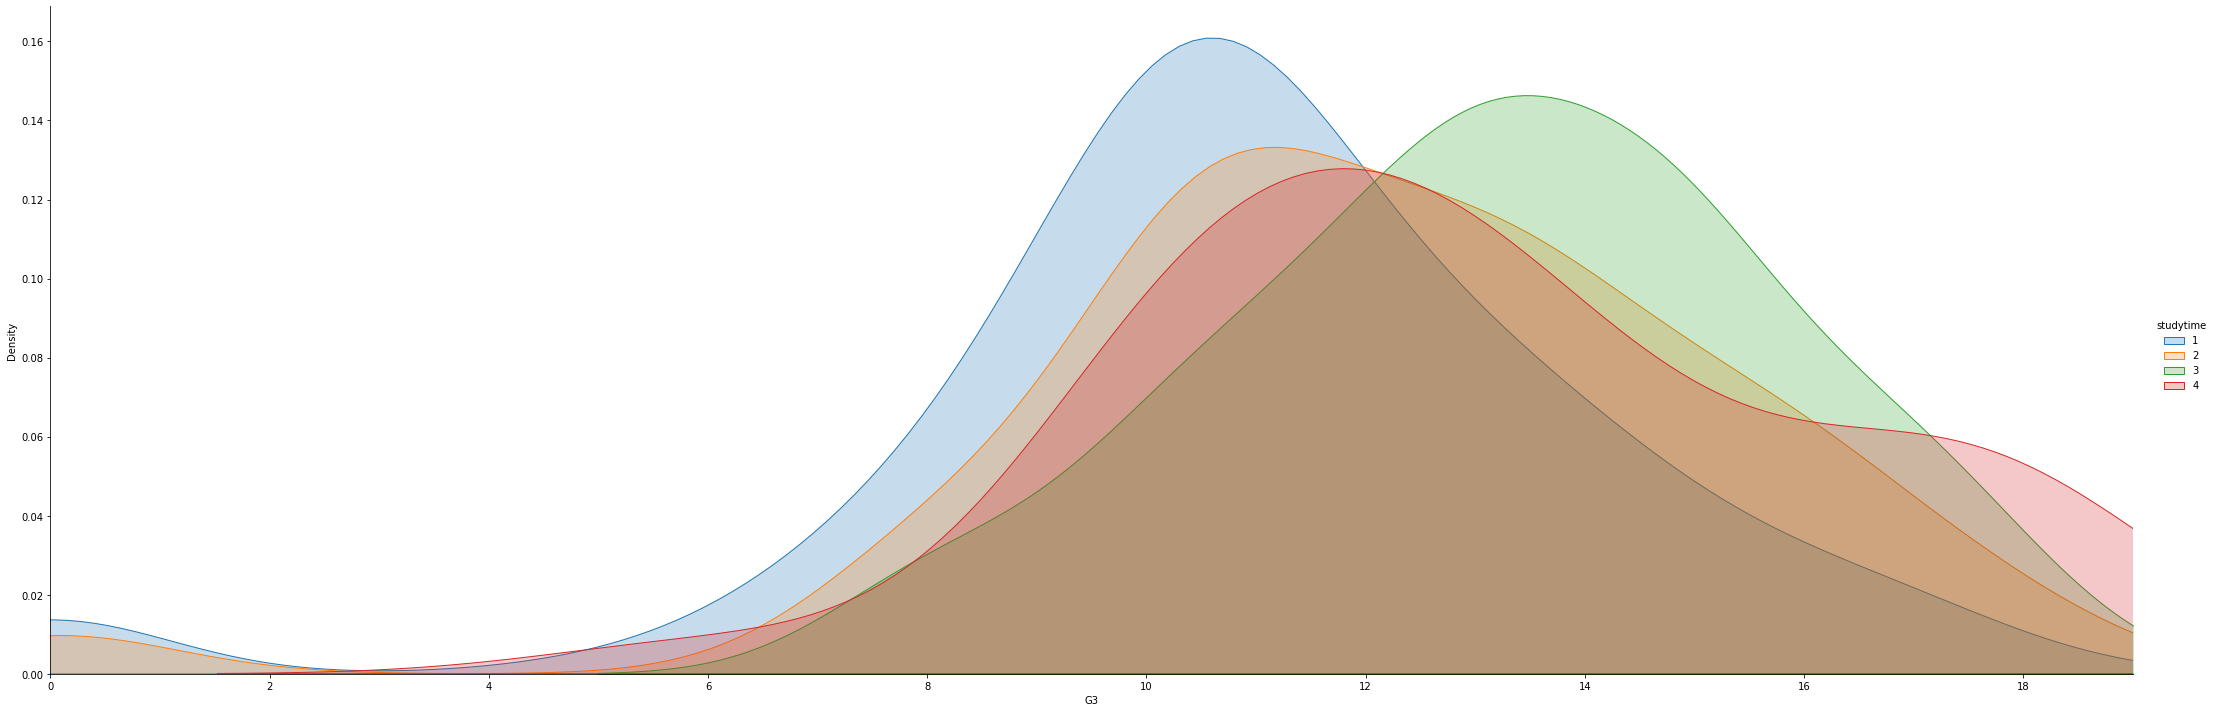

In [10]:
g = sns.FacetGrid(df, hue='studytime', height=10, aspect=3)
g.map(sns.kdeplot, 'G3', shade=True)
g.add_legend()
g.set(xticks=np.arange(0, df['G3'].max() + 1, 2), xlim=(0, df['G3'].max()))
#this is interesting, as students with green (5-10 study hours) tend to do better than students who study more than 10 hours a week. 

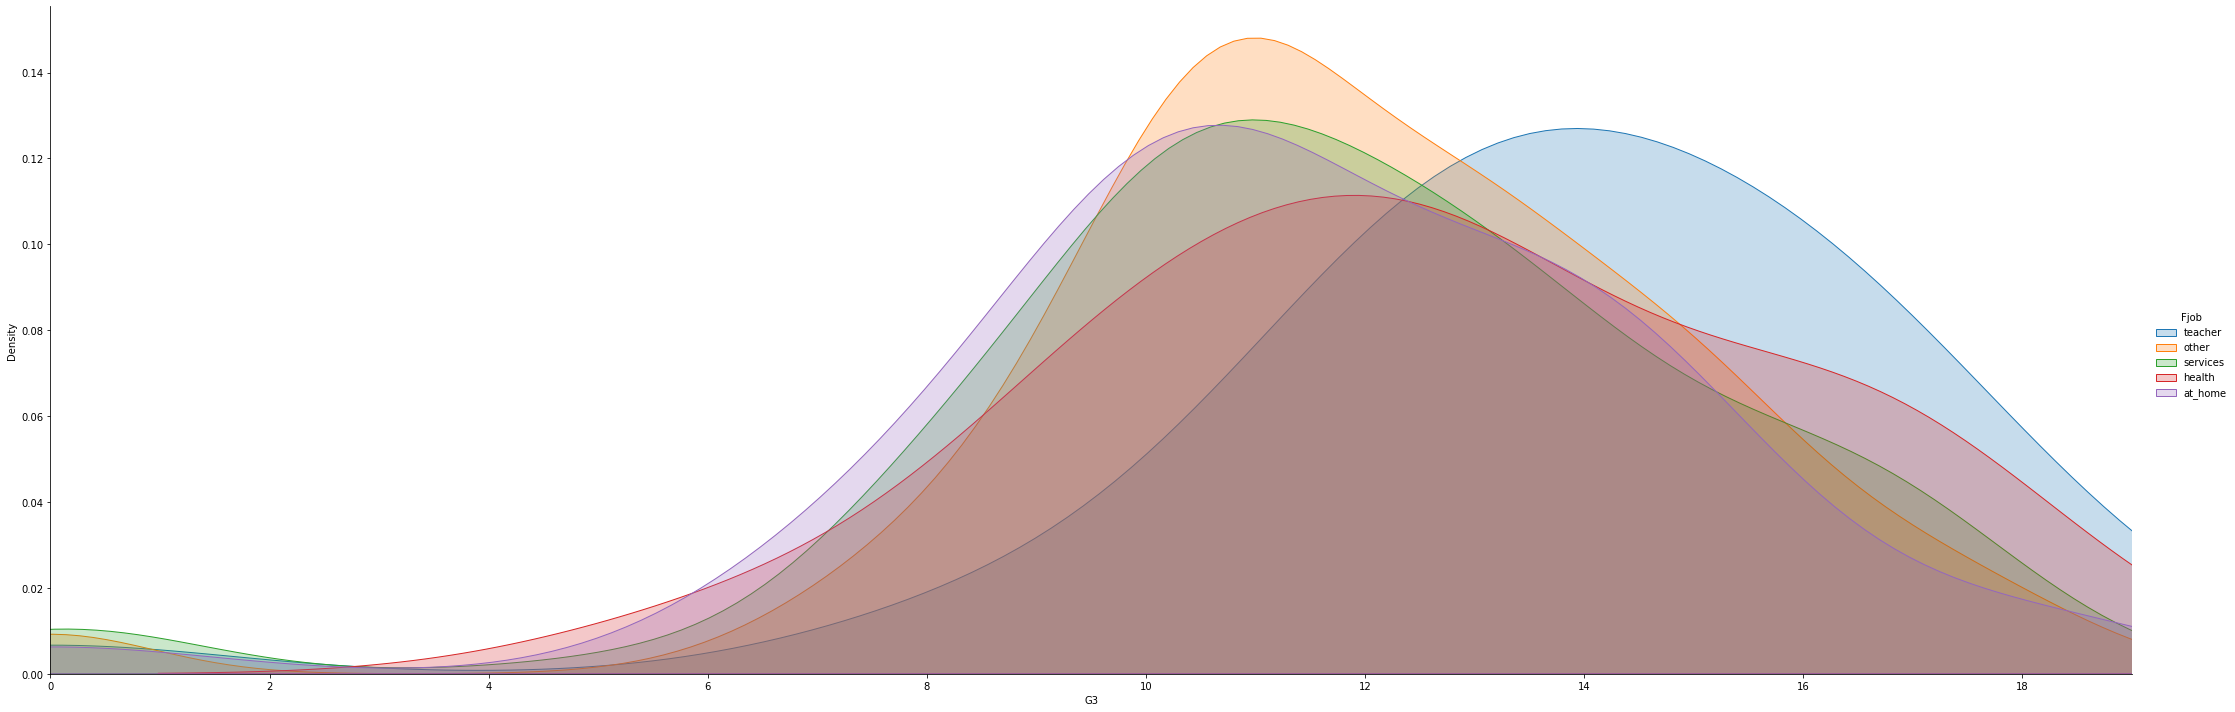

In [11]:
g = sns.FacetGrid(df, hue='Fjob', height=10, aspect=3)
g.map(sns.kdeplot, 'G3', shade=True)
g.add_legend()
g.set(xticks=np.arange(0, df['G3'].max() + 1, 2), xlim=(0, df['G3'].max()))
#father's job influences student performance pretty significantly depending on job

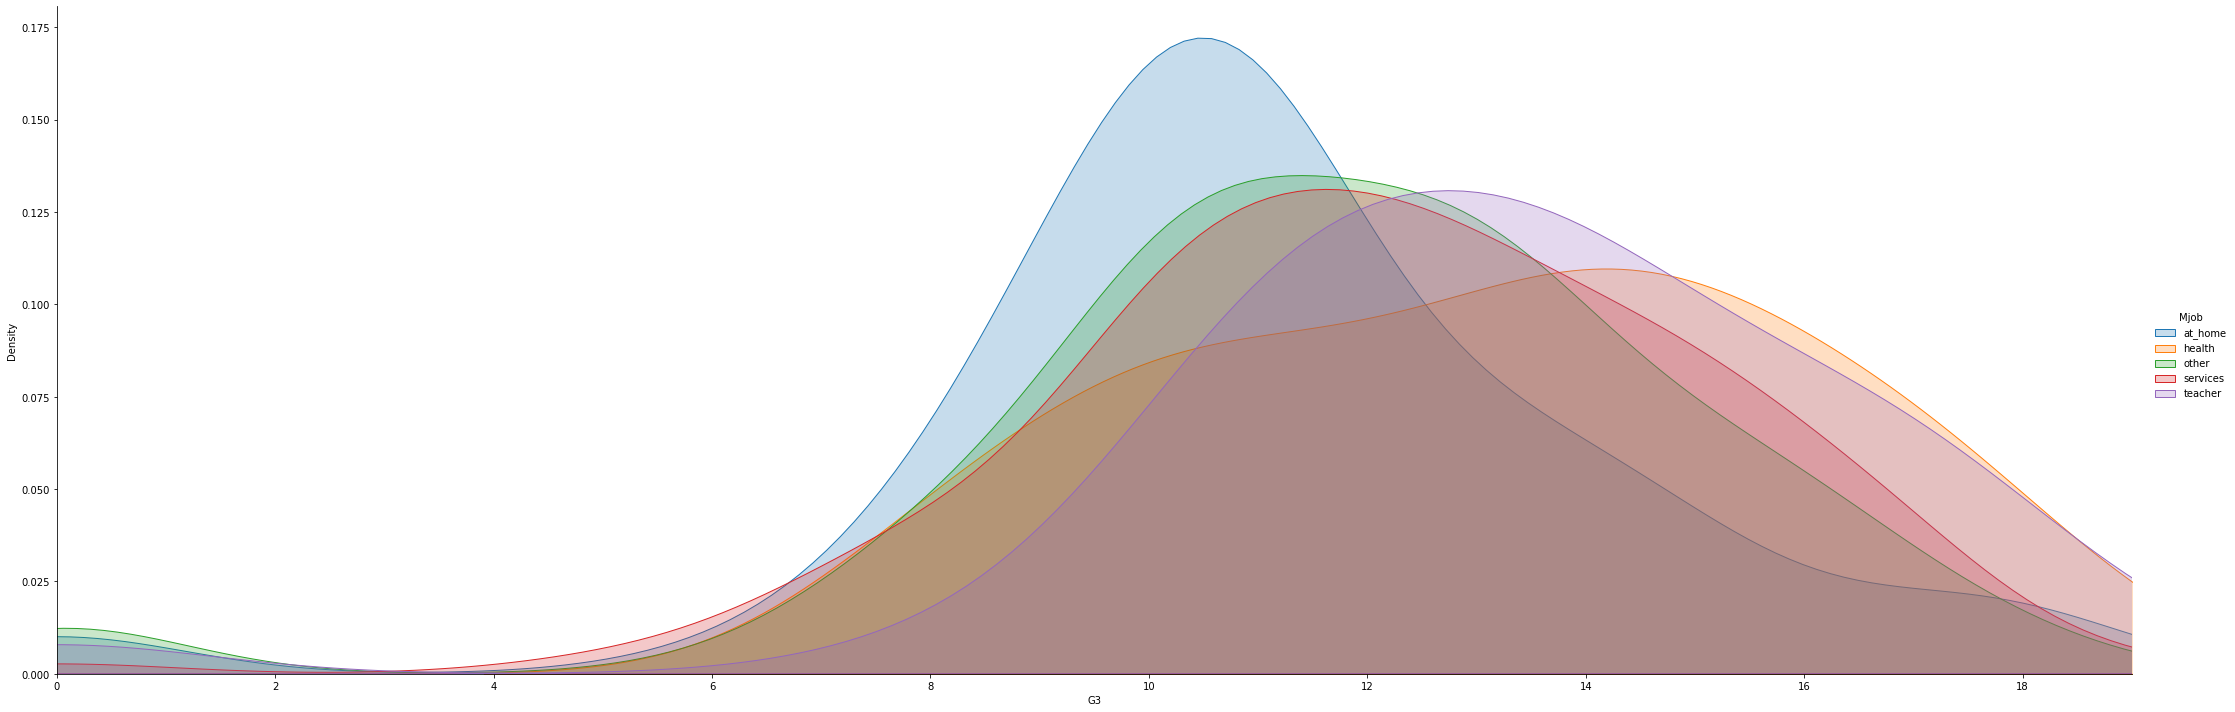

In [12]:
g = sns.FacetGrid(df, hue='Mjob', height=10, aspect=3)
g.map(sns.kdeplot, 'G3', shade=True)
g.add_legend()
g.set(xticks=np.arange(0, df['G3'].max() + 1, 2), xlim=(0, df['G3'].max()))
#mother's job influences student performance pretty significantly depending on job

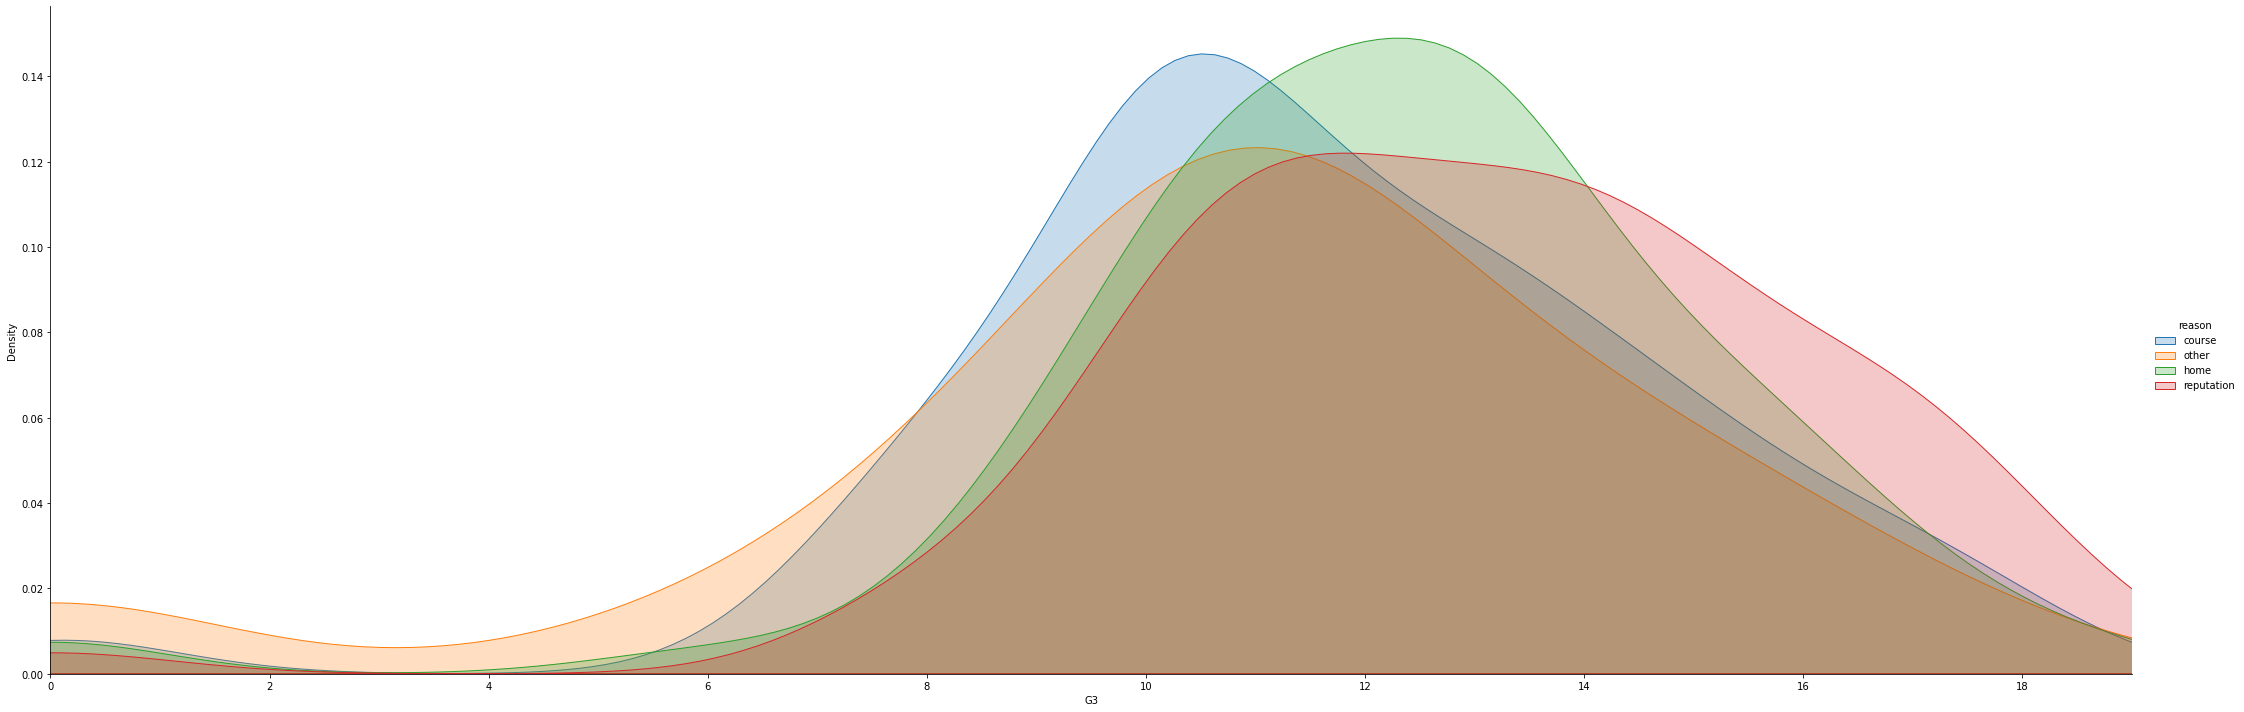

In [13]:
g = sns.FacetGrid(df, hue='reason', height=10, aspect=3)
g.map(sns.kdeplot, 'G3', shade=True)
g.add_legend()
g.set(xticks=np.arange(0, df['G3'].max() + 1, 2), xlim=(0, df['G3'].max()))
#reason influences student performance

In [14]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G1_bin,G2_bin,G3_bin
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,F,C,C
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,C,C,C
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,B,B,B
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,B,B,B
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,C,B,B
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,2,1,2,5,6,12,12,13,B,B,B
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,13,12,13,B,B,B
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,2,10,13,13,C,B,B
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,2,2,1,1,1,0,15,16,17,B,A,A
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,5,1,1,1,5,0,12,12,13,B,B,B


#Feature Selection

From the analysis above, the following features are all relevant to 

In [15]:
features = df.columns
feature_dict = {}

for feature in features:
  feature_dict[feature] = [df[feature].dtype,df[feature].unique()]

feature_df = pd.DataFrame(feature_dict).T
display(feature_df)

,0,1
school,object,"[GP, MS]"
sex,object,"[F, M]"
age,int64,"[18, 17, 15, 16, 19, 22, 20, 21]"
address,object,"[U, R]"
famsize,object,"[GT3, LE3]"
Pstatus,object,"[A, T]"
Medu,int64,"[4, 1, 3, 2, 0]"
Fedu,int64,"[4, 1, 2, 3, 0]"
Mjob,object,"[at_home, health, other, services, teacher]"
Fjob,object,"[teacher, other, services, health, at_home]"


For the features that are binary, we will change 'yes' to 1 and 'no' to 0. Additionally, we will one-hot encode the remaining non-int variables. Before we do this, we will drop the grade features that we are predicting.

In [88]:
drop_columns = ['G1', 'G2', 'G1_bin', 'G2_bin']

df_with_dropped_columns = df.drop(columns = drop_columns)
columns_without_G3 = df_with_dropped_columns.columns[:-1]
# columns_without_G3
df_ohe = pd.get_dummies(data = df_with_dropped_columns, columns = columns_without_G3)

In [89]:
df_ohe.head()

,G3_bin,school_GP,school_MS,sex_F,sex_M,age_15,age_16,age_17,age_18,age_19,age_20,age_21,age_22,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Medu_0,Medu_1,Medu_2,Medu_3,Medu_4,Fedu_0,Fedu_1,Fedu_2,Fedu_3,Fedu_4,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,traveltime_1,traveltime_2,traveltime_3,traveltime_4,studytime_1,studytime_2,studytime_3,studytime_4,failures_0,failures_1,failures_2,failures_3,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,famrel_1,famrel_2,famrel_3,famrel_4,famrel_5,freetime_1,freetime_2,freetime_3,freetime_4,freetime_5,goout_1,goout_2,goout_3,goout_4,goout_5,Dalc_1,Dalc_2,Dalc_3,Dalc_4,Dalc_5,Walc_1,Walc_2,Walc_3,Walc_4,Walc_5,health_1,health_2,health_3,health_4,health_5,absences_0,absences_1,absences_2,absences_3,absences_4,absences_5,absences_6,absences_7,absences_8,absences_9,absences_10,absences_11,absences_12,absences_13,absences_14,absences_15,absences_16,absences_18,absences_21,absences_22,absences_24,absences_26,absences_30,absences_32,G3_0,G3_1,G3_5,G3_6,G3_7,G3_8,G3_9,G3_10,G3_11,G3_12,G3_13,G3_14,G3_15,G3_16,G3_17,G3_18,G3_19
0,C,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,C,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,B,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,B,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,B,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


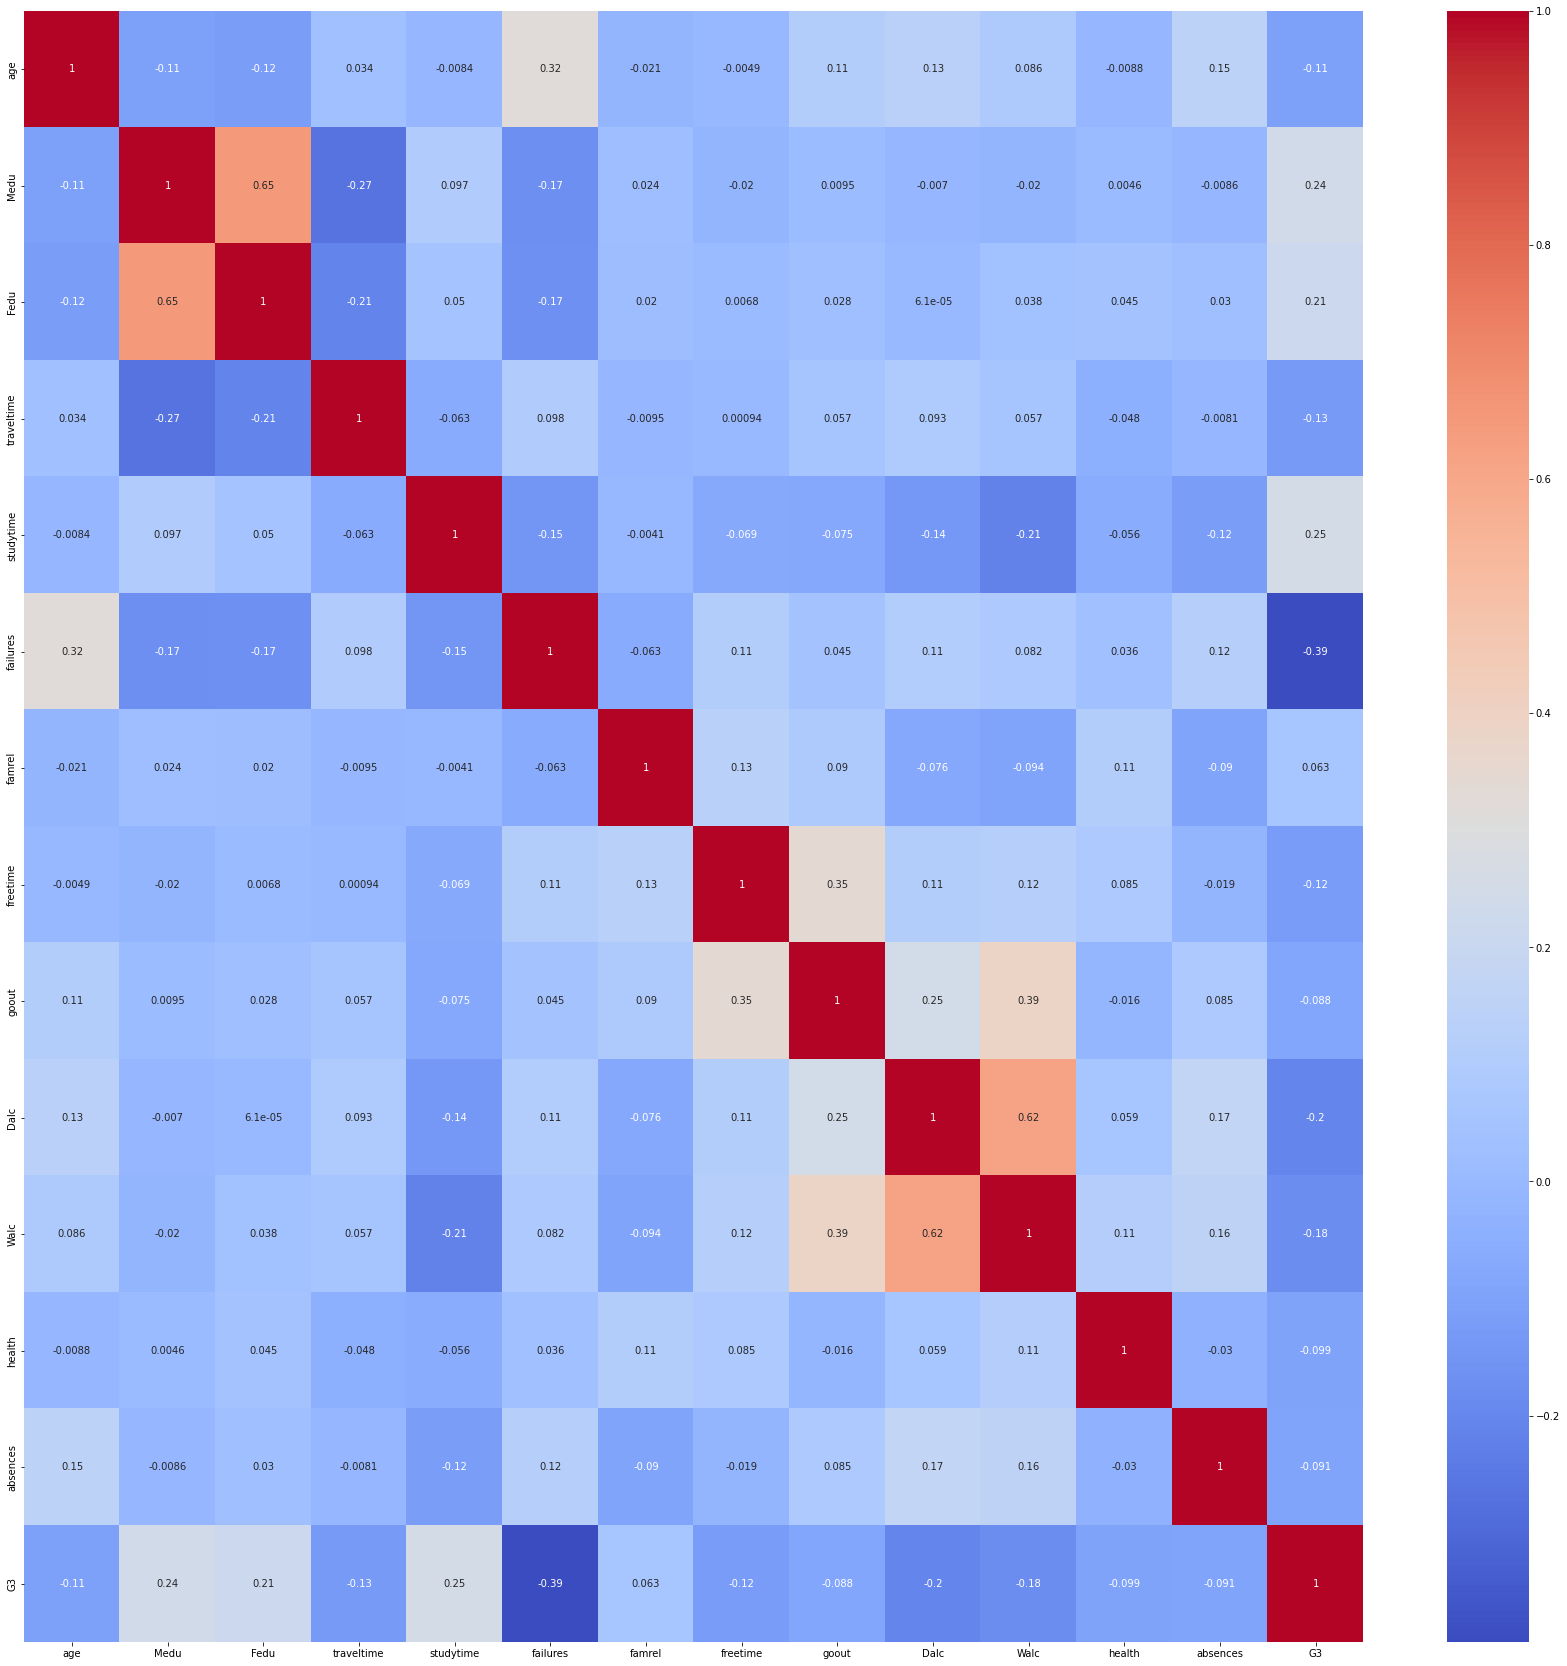

In [90]:
plt.figure(figsize = (30,30))
sns.heatmap(df_with_dropped_columns.corr(), cmap = 'coolwarm', annot = True);
plt.show()

#MODELS

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
df_x = df_ohe.drop(columns='G3_bin')
df_y = df_ohe['G3_bin']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.3)

In [23]:
values = y_test.value_counts().sort_index()
values

A    26
B    76
C    85
D     4
F     4
Name: G3_bin, dtype: int64

In [24]:
grade_accuracies = {}
for val in values.index:
 grade_accuracy = (values[val]/np.sum(values))
 grade_accuracies[val] = grade_accuracy
grade_accuracies

{'A': 0.13333333333333333,
 'B': 0.38974358974358975,
 'C': 0.4358974358974359,
 'D': 0.020512820512820513,
 'F': 0.020512820512820513}

In [25]:
################################################## Accuracy Function ####################################################

In [26]:
#Accuracy function

def model_accuracy(model, x_train, y_train, x_test, y_test):
  
  model.fit(x_train, y_train)


  train_pred = model.predict(x_train)
  test_pred = model.predict(x_test)

  #accuracy score for 0-19
  train_acc = accuracy_score(y_train, train_pred)
  test_acc = accuracy_score(y_test, test_pred)

  print('Accuracy of score for training set: ', train_acc, '\n')
  print('Accuracy of score for testing set: ', test_acc,'\n')

#Linear Discriminant Analaysis

In [56]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(solver = 'eigen', shrinkage = 'auto')

In [57]:
lda_acc = model_accuracy(lda, X_train, y_train, X_test, y_test)

Accuracy of score for training set:  0.6806167400881057 

Accuracy of score for testing set:  0.6051282051282051 



#Decision Trees

In [29]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt 
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier(random_state = 42)
grid_values_dtc = {'ccp_alpha': np.linspace(0, 0.1, 101)}
dtc_cv = GridSearchCV(dtc, param_grid = grid_values_dtc, cv = 5)

In [30]:
dtc_accuracy = model_accuracy(dtc_cv, X_train, y_train, X_test, y_test)

Accuracy of score for training set:  0.5859030837004405 

Accuracy of score for testing set:  0.5641025641025641 



In [60]:
print(dtc_cv.best_params_)

{'ccp_alpha': 0.01}


#Gradient Boosting Classifier

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

In [80]:
grid_values_gbc = {'n_estimators': np.logspace(5, 8, num=7, base=2, dtype='int32'),
               'max_leaf_nodes': [2, 3, 4, 5, 6, 8, 10]}
gbc = GradientBoostingClassifier(random_state = 42)
gbc_cv = GridSearchCV(gbc, param_grid=grid_values_gbc, cv = 5)

In [81]:
gbc = GradientBoostingClassifier(random_state = 42)

In [82]:
gbc_cv = GridSearchCV(gbc, param_grid=grid_values_gbc, cv = 5)

In [83]:
gbc_accuracy = model_accuracy(gbc_cv, X_train, y_train, X_test, y_test)
print(gbc_cv.best_params_)

Accuracy of score for training set:  0.6145374449339207 

Accuracy of score for testing set:  0.6 

{'max_leaf_nodes': 2, 'n_estimators': 32}


#Random Forest 

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rfc = RandomForestClassifier(random_state = 88)
grid_values_rfc = {'max_features': np.linspace(1,120,120, dtype='int32'),
                  'min_samples_leaf': [5],
                   'n_estimators': [500],
                   'random_state': [42]} 
rfc_cv = GridSearchCV(rfc, param_grid=grid_values_rfc, cv = 5, verbose = 0)

In [84]:
grid_values_rfc = {'max_features': np.linspace(1,120,120, dtype='int32'),
                  'min_samples_leaf': [5],
                   'n_estimators': [500],
                   'random_state': [42]} 

In [85]:
rfc_cv = GridSearchCV(rfc, param_grid=grid_values_rfc, cv = 5, verbose = 0)

In [86]:
rfc_accuracy = model_accuracy(rfc_cv, X_train, y_train, X_test, y_test)

Accuracy of score for training set:  0.7268722466960352 

Accuracy of score for testing set:  0.5641025641025641 



In [87]:
print(rfc_cv.best_params_)

{'max_features': 15, 'min_samples_leaf': 5, 'n_estimators': 500, 'random_state': 42}


In [42]:
from sklearn.neural_network import MLPClassifier

In [77]:
mlp = MLPClassifier(random_state = 42,solver = 'adam', activation = 'logistic', learning_rate = 'constant')

In [78]:
mlp_accuracy = model_accuracy(mlp, X_train, y_train, X_test, y_test)

Accuracy of score for training set:  0.7268722466960352 

Accuracy of score for testing set:  0.6051282051282051 



In [79]:
def better_accuracy_score_fn(df_tr, df_te, gender_train_column, gender_test_column):
  X_train = df_tr
  X_test = df_te
  accuracies = None
  acc_flag = False
  activations, solvers, learning_rates = ['identity', 'logistic', 'tanh', 'relu'], ['lbfgs', 'sgd', 'adam'], ['constant', 'invscaling', 'adaptive']


  for activation in activations:
    for solver in solvers:
      for learning_rate in learning_rates:
        clf = MLPClassifier(hidden_layer_sizes=(10,10), activation=activation, solver=solver, random_state = 1, learning_rate=learning_rate)
        clf.fit(X_train, gender_train_column)
        test_predictions = clf.predict(X_test)
        accuracy = accuracy_score(test_predictions, gender_test_column)
        if not acc_flag:
          accuracies = np.array([activation, solver, learning_rate, accuracy])
          acc_flag = True
        else:
          accuracies = np.vstack([accuracies, np.array([activation, solver, learning_rate, accuracy])])
        # print(f"{activation}, {solver}, {learning_rate}, {accuracy}")
  accuracy_df = pd.DataFrame(data=accuracies, columns=["activation", "solver", "learning_rate", "accuracy"])
  #return accuracy_df
  display(accuracy_df)
  return accuracy_df.loc[accuracy_df["accuracy"] == accuracy_df["accuracy"].max()]

X = better_accuracy_score_fn(X_train, X_test, y_train, y_test)
X


,activation,solver,learning_rate,accuracy
0,identity,lbfgs,constant,0.5230769230769231
1,identity,lbfgs,invscaling,0.5230769230769231
2,identity,lbfgs,adaptive,0.5230769230769231
3,identity,sgd,constant,0.558974358974359
4,identity,sgd,invscaling,0.18461538461538463
5,identity,sgd,adaptive,0.558974358974359
6,identity,adam,constant,0.6153846153846154
7,identity,adam,invscaling,0.6153846153846154
8,identity,adam,adaptive,0.6153846153846154
9,logistic,lbfgs,constant,0.5128205128205128


,activation,solver,learning_rate,accuracy
6,identity,adam,constant,0.6153846153846154
7,identity,adam,invscaling,0.6153846153846154
8,identity,adam,adaptive,0.6153846153846154
15,logistic,adam,constant,0.6153846153846154
16,logistic,adam,invscaling,0.6153846153846154
17,logistic,adam,adaptive,0.6153846153846154
